In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# show all columns 
pd.set_option('display.max_columns', None)

In [4]:
# open beer_df.csv
beer_df = pd.read_csv('data/beer_df.csv', low_memory=False)
beer_df.head()


,address,categories,city,country,key,lat,long,brewery_name,phones,postalCode,province,websites,index,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1494802,735,1026313935,4.5,4.0,5.0,jool,American IPA,4.5,4.5,Hop Caen,7.0,4205
1,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495017,735,1298940583,3.5,3.5,4.0,illidurit,American Double / Imperial IPA,3.5,3.5,21 Rock,9.7,66190
2,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495350,735,1228417395,4.0,4.0,4.0,magictrokini,American IPA,3.0,4.0,Harvest Moon,6.4,45648
3,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495733,735,1264280146,4.0,4.0,3.5,HapWifeHapLife,American IPA,4.0,4.0,21st Amendment IPA,7.0,20781
4,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1501253,735,1270753134,4.0,3.5,4.5,pwoody11,Belgian Strong Dark Ale,4.0,4.0,Monk's Blood,8.3,52510


In [5]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167421 entries, 0 to 167420
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   address             167421 non-null  object 
 1   categories          167421 non-null  object 
 2   city                167421 non-null  object 
 3   country             167421 non-null  object 
 4   key                 167421 non-null  object 
 5   lat                 167421 non-null  float64
 6   long                167421 non-null  float64
 7   brewery_name        167421 non-null  object 
 8   phones              167421 non-null  object 
 9   postalCode          167421 non-null  int64  
 10  province            167421 non-null  object 
 11  websites            167421 non-null  object 
 12  index               167421 non-null  int64  
 13  brewery_id          167421 non-null  int64  
 14  review_time         167421 non-null  int64  
 15  review_overall      167421 non-nul

In [6]:
# convert review time to datetime
beer_df['review_time'] = pd.to_datetime(beer_df['review_time'], unit='s')


In [7]:
# create new column of year based on review time
beer_df['review_year'] = beer_df['review_time'].dt.year
beer_df.head()

,address,categories,city,country,key,lat,long,brewery_name,phones,postalCode,province,websites,index,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,review_year
0,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1494802,735,2002-07-10 15:12:15,4.5,4.0,5.0,jool,American IPA,4.5,4.5,Hop Caen,7.0,4205,2002
1,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495017,735,2011-03-01 00:49:43,3.5,3.5,4.0,illidurit,American Double / Imperial IPA,3.5,3.5,21 Rock,9.7,66190,2011
2,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495350,735,2008-12-04 19:03:15,4.0,4.0,4.0,magictrokini,American IPA,3.0,4.0,Harvest Moon,6.4,45648,2008
3,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495733,735,2010-01-23 20:55:46,4.0,4.0,3.5,HapWifeHapLife,American IPA,4.0,4.0,21st Amendment IPA,7.0,20781,2010
4,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1501253,735,2010-04-08 18:58:54,4.0,3.5,4.5,pwoody11,Belgian Strong Dark Ale,4.0,4.0,Monk's Blood,8.3,52510,2010


In [8]:
# create new column of month based on review time
beer_df['review_month'] = beer_df['review_time'].dt.month
beer_df.head()


,address,categories,city,country,key,lat,long,brewery_name,phones,postalCode,province,websites,index,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,review_year,review_month
0,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1494802,735,2002-07-10 15:12:15,4.5,4.0,5.0,jool,American IPA,4.5,4.5,Hop Caen,7.0,4205,2002,7
1,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495017,735,2011-03-01 00:49:43,3.5,3.5,4.0,illidurit,American Double / Imperial IPA,3.5,3.5,21 Rock,9.7,66190,2011,3
2,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495350,735,2008-12-04 19:03:15,4.0,4.0,4.0,magictrokini,American IPA,3.0,4.0,Harvest Moon,6.4,45648,2008,12
3,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495733,735,2010-01-23 20:55:46,4.0,4.0,3.5,HapWifeHapLife,American IPA,4.0,4.0,21st Amendment IPA,7.0,20781,2010,1
4,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1501253,735,2010-04-08 18:58:54,4.0,3.5,4.5,pwoody11,Belgian Strong Dark Ale,4.0,4.0,Monk's Blood,8.3,52510,2010,4


decided to drop all rows that have less than 5000 entries per year, as it might help the recommendation systems accuracy. 

In [9]:
# drop rows by review_year that have less than 5000 reviews 
beer_df = beer_df[beer_df.groupby('review_year')['review_overall'].transform('count').ge(5000)]
beer_df.head()


,address,categories,city,country,key,lat,long,brewery_name,phones,postalCode,province,websites,index,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,review_year,review_month
1,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495017,735,2011-03-01 00:49:43,3.5,3.5,4.0,illidurit,American Double / Imperial IPA,3.5,3.5,21 Rock,9.7,66190,2011,3
2,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495350,735,2008-12-04 19:03:15,4.0,4.0,4.0,magictrokini,American IPA,3.0,4.0,Harvest Moon,6.4,45648,2008,12
3,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495733,735,2010-01-23 20:55:46,4.0,4.0,3.5,HapWifeHapLife,American IPA,4.0,4.0,21st Amendment IPA,7.0,20781,2010,1
4,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1501253,735,2010-04-08 18:58:54,4.0,3.5,4.5,pwoody11,Belgian Strong Dark Ale,4.0,4.0,Monk's Blood,8.3,52510,2010,4
5,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1501262,735,2010-03-14 16:30:10,4.0,3.5,4.0,metter98,Belgian Strong Dark Ale,4.0,4.5,Monk's Blood,8.3,52510,2010,3


In [10]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160451 entries, 1 to 167420
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   address             160451 non-null  object        
 1   categories          160451 non-null  object        
 2   city                160451 non-null  object        
 3   country             160451 non-null  object        
 4   key                 160451 non-null  object        
 5   lat                 160451 non-null  float64       
 6   long                160451 non-null  float64       
 7   brewery_name        160451 non-null  object        
 8   phones              160451 non-null  object        
 9   postalCode          160451 non-null  int64         
 10  province            160451 non-null  object        
 11  websites            160451 non-null  object        
 12  index               160451 non-null  int64         
 13  brewery_id          160451 no

In [11]:
beer_df['beer_style'].value_counts()

American IPA                      22925
American Double / Imperial IPA    12957
American Strong Ale                9675
American Pale Ale (APA)            9322
American Porter                    8886
                                  ...  
Flanders Oud Bruin                   13
American Dark Wheat Ale               8
Roggenbier                            7
Euro Strong Lager                     5
Low Alcohol Beer                      1
Name: beer_style, Length: 96, dtype: int64

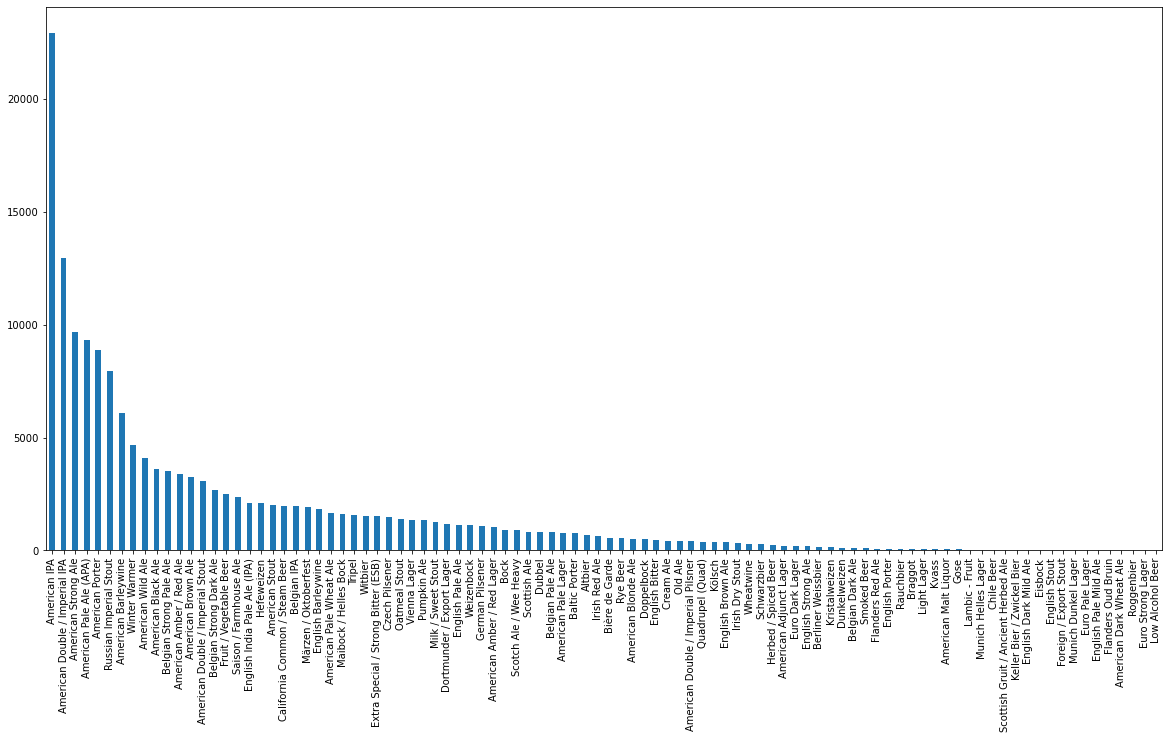

In [12]:
# plot beer styles by count
beer_df['beer_style'].value_counts().plot(kind='bar', figsize=(20,10))
plt.show()


In [13]:
# create new column based on beer styles by beer type stated if different key words are in the beer style
beer_df['beer_type'] = np.where(beer_df['beer_style'].str.contains('IPA'), 'IPA',
                                np.where(beer_df['beer_style'].str.contains('Stout'), 'Stout',
                                            np.where(beer_df['beer_style'].str.contains('Porter'), 'Porter',
                                                        np.where(beer_df['beer_style'].str.contains('Lager'), 'Lager',
                                                                    np.where(beer_df['beer_style'].str.contains('Ale'), 'Ale',
                                                                                np.where(beer_df['beer_style'].str.contains('Wheat'), 'Wheat',
                                                                                            np.where(beer_df['beer_style'].str.contains('Pilsner'), 'Pilsner',
                                                                                                        np.where(beer_df['beer_style'].str.contains('Sour'), 'Sour',
                                                                                                                    np.where(beer_df['beer_style'].str.contains('Pale'), 'Pale',
                                                                                                                                np.where(beer_df['beer_style'].str.contains('Barley'), 'Barley',
                                                                                                                                            np.where(beer_df['beer_style'].str.contains('Belgian'), 'Belgian',
                                                                                                                                                np.where(beer_df['beer_style'].str.contains('Bock'), 'Bock',
                                                                                                                                                    np.where(beer_df['beer_style'].str.contains('Malt'), 'Malt',
                                                                                                                                                        np.where(beer_df['beer_style'].str.contains('Witbier'), 'Witbier',
                                                                                                                                                            np.where(beer_df['beer_style'].str.contains('Doppelbock'), 'Doppelbock',
                                                                                                                                                                np.where(beer_df['beer_style'].str.contains('Rauchbier'), 'Rauchbier',
                                                                                                                                                                    np.where(beer_df['beer_style'].str.contains('Kölsch'), 'Kölsch',
                                                                                                                                                                        np.where(beer_df['beer_style'].str.contains('Dunkel'), 'Dunkel',
                                                                                                                                                                            np.where(beer_df['beer_style'].str.contains('Weizenbock'), 'Weizenbock',
                                                                                                                                                                                np.where(beer_df['beer_style'].str.contains('Schwarzbier'), 'Schwarzbier',
                                                                                                                                                                                    np.where(beer_df['beer_style'].str.contains('Gose'), 'Gose',
                                                                                                                                                                                        np.where(beer_df['beer_style'].str.contains('Fruit'), 'Fruit',
                                                                                                                                                                                            np.where(beer_df['beer_style'].str.contains('Bière'), 'Bière',
                                                                                                  
'Other')))))))))))))))))))))))

beer_df.head()



,address,categories,city,country,key,lat,long,brewery_name,phones,postalCode,province,websites,index,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,review_year,review_month,beer_type
1,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495017,735,2011-03-01 00:49:43,3.5,3.5,4.0,illidurit,American Double / Imperial IPA,3.5,3.5,21 Rock,9.7,66190,2011,3,IPA
2,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495350,735,2008-12-04 19:03:15,4.0,4.0,4.0,magictrokini,American IPA,3.0,4.0,Harvest Moon,6.4,45648,2008,12,IPA
3,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495733,735,2010-01-23 20:55:46,4.0,4.0,3.5,HapWifeHapLife,American IPA,4.0,4.0,21st Amendment IPA,7.0,20781,2010,1,IPA
4,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1501253,735,2010-04-08 18:58:54,4.0,3.5,4.5,pwoody11,Belgian Strong Dark Ale,4.0,4.0,Monk's Blood,8.3,52510,2010,4,Ale
5,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1501262,735,2010-03-14 16:30:10,4.0,3.5,4.0,metter98,Belgian Strong Dark Ale,4.0,4.5,Monk's Blood,8.3,52510,2010,3,Ale


In [14]:
beer_df = pd.concat([beer_df, pd.get_dummies(beer_df['beer_type'])], axis=1)
beer_df.head()

,address,categories,city,country,key,lat,long,brewery_name,phones,postalCode,province,websites,index,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,review_year,review_month,beer_type,Ale,Barley,Bière,Bock,Doppelbock,Dunkel,Fruit,Gose,IPA,Kölsch,Lager,Malt,Other,Pilsner,Porter,Rauchbier,Schwarzbier,Stout,Weizenbock,Wheat,Witbier
1,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495017,735,2011-03-01 00:49:43,3.5,3.5,4.0,illidurit,American Double / Imperial IPA,3.5,3.5,21 Rock,9.7,66190,2011,3,IPA,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495350,735,2008-12-04 19:03:15,4.0,4.0,4.0,magictrokini,American IPA,3.0,4.0,Harvest Moon,6.4,45648,2008,12,IPA,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495733,735,2010-01-23 20:55:46,4.0,4.0,3.5,HapWifeHapLife,American IPA,4.0,4.0,21st Amendment IPA,7.0,20781,2010,1,IPA,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1501253,735,2010-04-08 18:58:54,4.0,3.5,4.5,pwoody11,Belgian Strong Dark Ale,4.0,4.0,Monk's Blood,8.3,52510,2010,4,Ale,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1501262,735,2010-03-14 16:30:10,4.0,3.5,4.0,metter98,Belgian Strong Dark Ale,4.0,4.5,Monk's Blood,8.3,52510,2010,3,Ale,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


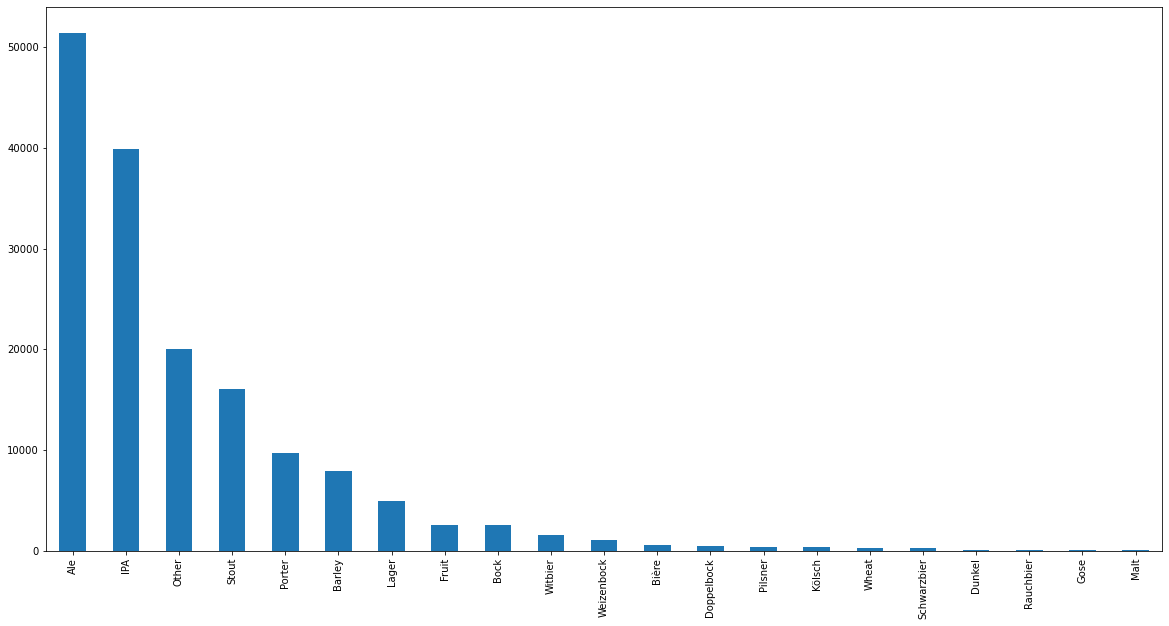

In [15]:
# plot all beer_types by count
beer_df['beer_type'].value_counts().plot(kind='bar', figsize=(20,10))
plt.show()


## Data Modeling

In [11]:
# create baseline model of beer_df with normal_predictor and train test split from surprise using this link: 
#https://www.alldatascience.com/recommender-systems/simple-recipe-recommender-system-with-scikit-surprise/
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(beer_df[['review_profilename', 'beer_name', 'review_overall']], reader)

trainset, testset = train_test_split(data, test_size=.25)

algo = NormalPredictor()
algo.fit(trainset)
predictions = algo.test(testset)

accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 0.8704
MAE:  0.6856


0.6856000781351714

Our Baseline Model has shown a decent overall start, with our rmse and mae being high. Next we will try to improve those metrics. 

In [12]:
# Running a model with SVD
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(beer_df[['review_profilename', 'beer_name', 'review_overall']], reader)

trainset, testset = train_test_split(data, test_size=.25)

algo = SVD()
algo.fit(trainset)
predictions = algo.test(testset)

accuracy.rmse(predictions)
accuracy.mae(predictions)


RMSE: 0.5652
MAE:  0.4199


0.41991991866577516

Our SVD Model has the best overall rmse and mae compared to our other models. We can now try it with more factors to see if any changes will occur. 

In [13]:
# run cross validation on SVD model with 50 factors
from surprise.model_selection import cross_validate
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.5636  0.5629  0.5553  0.5618  0.5640  0.5615  0.0032  
MAE (testset)     0.4198  0.4202  0.4137  0.4191  0.4207  0.4187  0.0026  
Fit time          10.07   9.70    9.84    10.16   9.89    9.93    0.17    
Test time         0.12    0.11    0.13    0.12    0.11    0.12    0.01    


{'test_rmse': array([0.56364187, 0.56287511, 0.55525368, 0.56175295, 0.56404778]),
 'test_mae': array([0.41982241, 0.42024992, 0.41365039, 0.41908767, 0.42068471]),
 'fit_time': (10.073994159698486,
  9.695145845413208,
  9.835587978363037,
  10.15890908241272,
  9.890829086303711),
 'test_time': (0.1170651912689209,
  0.11388230323791504,
  0.13370800018310547,
  0.11629724502563477,
  0.11333417892456055)}

Scores are about the same as before, but being that our MAE is around a 0.4 is very good for a cold-start recommender system. 

# Item-based Recommendation System

In [ ]:
# create new dataframe with review_profilename and beer_name as well as all beer_types columns
beer_df2 = beer_df[['review_profilename', 'beer_name', 'IPA', 'Stout', 'Porter', 'Lager', 'Ale', 'Wheat', 'Pilsner',  'Barley', 'Bock', 'Malt', 'Witbier', 'Doppelbock', 'Rauchbier', 'Kölsch', 'Dunkel', 'Weizenbock', 'Schwarzbier', 'Gose', 'Fruit', 'Bière', 'Other']]
beer_df2.head(10)


,review_profilename,beer_name,IPA,Stout,Porter,Lager,Ale,Wheat,Pilsner,Barley,Bock,Malt,Witbier,Doppelbock,Rauchbier,Kölsch,Dunkel,Weizenbock,Schwarzbier,Gose,Fruit,Bière,Other
1,illidurit,21 Rock,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,magictrokini,Harvest Moon,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,HapWifeHapLife,21st Amendment IPA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,pwoody11,Monk's Blood,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,metter98,Monk's Blood,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1]:
# create content based model using sklearn cosine_similarity and linear_kernel to find similar beers based on beer types 

In [ ]:
# create grid search to find best parameters for SVD model
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(beer_df[['review_profilename', 'beer_name', 'review_overall']], reader)

param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
                'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])



In [ ]:
# create randomsearchcv to find best parameters for SVD model
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import RandomizedSearchCV

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(beer_df[['review_profilename', 'beer_name', 'review_overall']], reader)

param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
                'reg_all': [0.4, 0.6]}
gs = RandomizedSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


In [ ]:
# create a baseline model of entire dataset using content-based filtering recommender system and train test split and surprise library
# https://towardsdatascience.com/building-and-testing-recommender-saystems-with-surprise-step-by-step-d4ba702ef80b

import surprise
from surprise import Reader, Dataset, SVD
from surprise.accuracy import rmse, mae
from surprise.model_selection import train_test_split

# create a reader object
reader = Reader(rating_scale=(1, 5))

# create a dataset object
data = Dataset.load_from_df(beer_df[['review_profilename', 'beer_name', 'review_overall']], reader)

# split data into train and test sets
trainset, testset = train_test_split(data, test_size=0.25)

# create a SVD object
svd = SVD()

# train the model
svd.fit(trainset)

#predict ratings for the test set
predictions = svd.test(testset)

# evaluate the model
rmse(predictions)
mae(predictions)

# create a function to predict the rating of a beer for a user
def predict_rating(user, beer):
    beer_id = beer_df[beer_df['beer_name'] == beer]['beer_beerid'].unique()[0]
    user_id = beer_df[beer_df['review_profilename'] == user]['review_profilename'].unique()[0]
    return svd.predict(user_id, beer_id).est

# create a function to recommend beers to a user
def recommend_beers(user, n):
    # get all beers reviewed by user
    reviewed_beers = beer_df[beer_df['review_profilename'] == user]['beer_name']
    # get all beers not reviewed by user
    not_reviewed = beer_df[beer_df['beer_name'].isin(reviewed_beers) == False]['beer_name'].unique()
    # create a dataframe of beers not reviewed by user
    not_reviewed_df = pd.DataFrame(not_reviewed, columns=['beer_name'])
    # add a predicted rating column to the dataframe
    not_reviewed_df['predicted_rating'] = not_reviewed_df['beer_name'].apply(lambda x: predict_rating(user, x))
    # sort the dataframe by predicted rating
    not_reviewed_df = not_reviewed_df.sort_values('predicted_rating', ascending=False)
    # return the top n beers
    return not_reviewed_df.head(n)

# recommend 10 beers to user 'Sean'
#recommend_beers('HapWifeHapLife', 10)

# create a function to recommend beers to a user based on a specific style
def recommend_beers_style(user, style, n):
    # get all beers reviewed by user
    reviewed_beers = beer_df[beer_df['review_profilename'] == user]['beer_name']
    # get all beers not reviewed by user
    not_reviewed = beer_df[~beer_df['beer_name'].isin(reviewed_beers)]['beer_name'].unique()
    # create a dataframe of beers not reviewed by user
    not_reviewed_df = pd.DataFrame(not_reviewed, columns=['beer_name'])
    # add a predicted rating column to the dataframe
    not_reviewed_df['predicted_rating'] = not_reviewed_df['beer_name'].apply(lambda x: predict_rating(user, x))
    # sort the dataframe by predicted rating
    not_reviewed_df = not_reviewed_df.sort_values('predicted_rating', ascending=False)
    # get all beers of a specific style
    style_df = beer_df[beer_df['beer_style'] == style]
    # remove any duplicate beer names from the style dataframe
    style_df = style_df.drop_duplicates(subset='beer_name')
    # merge the style dataframe with the not reviewed dataframe
    merged_df = pd.merge(not_reviewed_df, style_df, on='beer_name')
    # return the top n beers
    return merged_df.head(n)

# recommend 10 beers to user of style 'American IPA'
#recommend_beers_style('HapWifeHapLife', 'American IPA', 10)

# create a function to recommend beers to a user based on a specific brewery
def recommend_beers_brewery(user, brewery, n):
    # get all beers reviewed by user
    reviewed_beers = beer_df[beer_df['review_profilename'] == user]['beer_name']
    # get all beers not reviewed by user
    not_reviewed = beer_df[beer_df['beer_name'].isin(reviewed_beers) == False]['beer_name'].unique()
    # create a dataframe of beers not reviewed by user
    not_reviewed_df = pd.DataFrame(not_reviewed, columns=['beer_name'])
    # add a predicted rating column to the dataframe
    not_reviewed_df['predicted_rating'] = not_reviewed_df['beer_name'].apply(lambda x: predict_rating(user, x))
    # sort the dataframe by predicted rating
    not_reviewed_df = not_reviewed_df.sort_values('predicted_rating', ascending=False)
    # get all beers of a specific brewery
    brewery_df = beer_df[beer_df['brewery_name'] == brewery]
    # remove any duplicate beer names from the brewery dataframe
    brewery_df = brewery_df.drop_duplicates(subset='beer_name')
    # merge the brewery dataframe with the not reviewed dataframe
    merged_df = pd.merge(not_reviewed_df, brewery_df, on='beer_name')
    # return the top n beers
    return merged_df.head(n)

# recommend 10 beers to user of style specific brewery
#recommend_beers_brewery('HapWifeHapLife', 'Sierra Nevada Brewing Co.', 10)




In [ ]:
# recommend 10 beers to user
recommend_beers('HapWifeHapLife', 10)

NameError: name 'svd' is not defined

In [ ]:
# recommend 10 beers to user of style 'American IPA'
recommend_beers_style('HapWifeHapLife', 'American IPA', 10)

,beer_name,predicted_rating,address,categories,city,country,key,lat,long,brewery_name,phones,postalCode,province,websites,index,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_abv,beer_beerid,review_year,review_month
0,Hop Caen,3.976997,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1494802,735,2002-07-10 15:12:15,4.5,4.0,5.0,jool,American IPA,4.5,4.5,7.0,4205,2002,7
1,Portsmouth Hop Harvest #1,3.976997,56 Market St,"Brewery, Bar",Portsmouth,US,us/nh/portsmouth/56marketst,43.078007,-70.757599,Portsmouth Brewery,6034311115,3801,NH,http://portsmouthbrewery.com,1434626,596,2011-09-28 05:11:12,4.0,4.0,4.0,Bendurgin,American IPA,3.0,4.0,6.5,20146,2011,9
2,Portsmouth 5 C's IPA,3.976997,56 Market St,"Brewery, Bar",Portsmouth,US,us/nh/portsmouth/56marketst,43.078007,-70.757599,Portsmouth Brewery,6034311115,3801,NH,http://portsmouthbrewery.com,1435877,596,2011-01-23 20:02:04,4.5,4.0,5.0,dciBA,American IPA,4.0,4.5,6.5,44727,2011,1
3,Portsmouth Bottle Rocket IPA,3.976997,56 Market St,"Brewery, Bar",Portsmouth,US,us/nh/portsmouth/56marketst,43.078007,-70.757599,Portsmouth Brewery,6034311115,3801,NH,http://portsmouthbrewery.com,1435195,596,2010-10-16 02:03:23,4.0,4.0,4.5,mdaschaf,American IPA,4.0,4.0,6.5,5219,2010,10
4,Portsmouth Wild Duck Rye IPA,3.976997,56 Market St,"Brewery, Bar",Portsmouth,US,us/nh/portsmouth/56marketst,43.078007,-70.757599,Portsmouth Brewery,6034311115,3801,NH,http://portsmouthbrewery.com,1435600,596,2011-05-30 16:14:22,4.5,4.5,3.5,Bendurgin,American IPA,4.0,4.0,6.3,69561,2011,5
5,Portsmouth Ginga' Ninja IPA,3.976997,56 Market St,"Brewery, Bar",Portsmouth,US,us/nh/portsmouth/56marketst,43.078007,-70.757599,Portsmouth Brewery,6034311115,3801,NH,http://portsmouthbrewery.com,1435532,596,2011-12-28 20:53:43,2.0,3.0,2.5,ffejherb,American IPA,2.5,2.5,6.5,70849,2011,12
6,Anniversary Ale 2011,3.976997,1430 Washington Ave S,"American Restaurant, Brewery and American Rest...",Minneapolis,US,us/mn/minneapolis/1430washingtonaves,44.973266,-93.247733,Minneapolis Town Hall Brewery,6123398696,55454,MN,http://townhallbrewery.com,357644,1177,2011-12-18 22:41:09,4.0,4.5,4.5,mothman,American IPA,4.0,4.0,6.8,74581,2011,12
7,Anniversary Ale 2010,3.976997,1430 Washington Ave S,"American Restaurant, Brewery and American Rest...",Minneapolis,US,us/mn/minneapolis/1430washingtonaves,44.973266,-93.247733,Minneapolis Town Hall Brewery,6123398696,55454,MN,http://townhallbrewery.com,357464,1177,2011-12-01 00:49:25,4.0,3.5,4.0,mothman,American IPA,4.0,4.0,6.5,62952,2011,12
8,Portsmouth Hop Harvest #2,3.976997,56 Market St,"Brewery, Bar",Portsmouth,US,us/nh/portsmouth/56marketst,43.078007,-70.757599,Portsmouth Brewery,6034311115,3801,NH,http://portsmouthbrewery.com,1434235,596,2011-10-29 13:47:01,4.0,4.0,3.5,KTCamm,American IPA,3.5,4.0,6.0,45136,2011,10
9,Saint Arnold Sailing Santa,3.976997,2000 Lyons Ave,"Brewery, Beer Garden",Houston,US,us/tx/houston/2000lyonsave,29.771590,-95.348790,Saint Arnold Brewing Company,7136869494,77020,TX,http://www.saintarnold.com,1092590,337,2012-01-09 13:19:24,3.0,3.0,3.5,2378GCGTG,American IPA,3.5,3.0,7.0,75548,2012,1


In [ ]:
# recommend 10 beers to user of style specific brewery
recommend_beers_brewery('HapWifeHapLife', 'Sierra Nevada Brewing Co.', 10)

,beer_name,predicted_rating,address,categories,city,country,key,lat,long,brewery_name,phones,postalCode,province,websites,index,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_abv,beer_beerid,review_year,review_month
0,"Que Syrah, Syrah!",3.976997,1075 E 20th St,"Brew Pubs, Restaurants, Pub, Brewery, Liquor S...",Chico,US,us/ca/chico/1075e20thst,39.724604,-121.815715,Sierra Nevada Brewing Co.,"5308933520, 5303452739",95928,CA,http://www.sierranevada.com,70903,140,2010-03-04 13:32:28,4.5,4.0,4.0,WesWes,Saison / Farmhouse Ale,4.0,4.0,8.41,56565,2010,3
1,Best Of Beer Camp: Double IPA - Beer Camp #29,3.976997,1075 E 20th St,"Brew Pubs, Restaurants, Pub, Brewery, Liquor S...",Chico,US,us/ca/chico/1075e20thst,39.724604,-121.815715,Sierra Nevada Brewing Co.,"5308933520, 5303452739",95928,CA,http://www.sierranevada.com,76120,140,2011-12-06 20:57:20,4.0,4.0,4.0,CampusCrew,American Double / Imperial IPA,4.0,4.5,8.50,68958,2011,12
2,Sierra Nevada Summerfest Lager,3.976997,1075 E 20th St,"Brew Pubs, Restaurants, Pub, Brewery, Liquor S...",Chico,US,us/ca/chico/1075e20thst,39.724604,-121.815715,Sierra Nevada Brewing Co.,"5308933520, 5303452739",95928,CA,http://www.sierranevada.com,76053,140,2005-06-07 23:17:26,3.5,3.0,3.0,ybnorml,Czech Pilsener,3.5,3.0,5.00,3558,2005,6
3,Loch Hop & Barrel - Beer Camp #35,3.976997,1075 E 20th St,"Brew Pubs, Restaurants, Pub, Brewery, Liquor S...",Chico,US,us/ca/chico/1075e20thst,39.724604,-121.815715,Sierra Nevada Brewing Co.,"5308933520, 5303452739",95928,CA,http://www.sierranevada.com,73947,140,2011-02-18 18:11:11,2.0,3.0,3.5,drummstikk,Scotch Ale / Wee Heavy,4.0,2.0,8.00,66346,2011,2
4,Sierra Nevada Brown Saison,3.976997,1075 E 20th St,"Brew Pubs, Restaurants, Pub, Brewery, Liquor S...",Chico,US,us/ca/chico/1075e20thst,39.724604,-121.815715,Sierra Nevada Brewing Co.,"5308933520, 5303452739",95928,CA,http://www.sierranevada.com,73860,140,2011-01-03 21:07:41,4.5,3.5,4.0,Swimsum,Saison / Farmhouse Ale,4.0,4.5,7.85,49351,2011,1
5,Best Bitter Ale With Cascade And Chinook Dry Hops,3.976997,1075 E 20th St,"Brew Pubs, Restaurants, Pub, Brewery, Liquor S...",Chico,US,us/ca/chico/1075e20thst,39.724604,-121.815715,Sierra Nevada Brewing Co.,"5308933520, 5303452739",95928,CA,http://www.sierranevada.com,73508,140,2009-09-20 04:48:15,5.0,3.0,4.0,ThreeWiseMen,English Bitter,4.5,4.5,4.60,52755,2009,9
6,Empire Strikes Black Imperial Stout - Beer Cam...,3.976997,1075 E 20th St,"Brew Pubs, Restaurants, Pub, Brewery, Liquor S...",Chico,US,us/ca/chico/1075e20thst,39.724604,-121.815715,Sierra Nevada Brewing Co.,"5308933520, 5303452739",95928,CA,http://www.sierranevada.com,73319,140,2011-05-22 14:42:31,4.0,4.0,4.0,barleywinefiend,Russian Imperial Stout,4.0,4.0,9.80,50413,2011,5
7,Sticke Pilsner - Beer Camp #43,3.976997,1075 E 20th St,"Brew Pubs, Restaurants, Pub, Brewery, Liquor S...",Chico,US,us/ca/chico/1075e20thst,39.724604,-121.815715,Sierra Nevada Brewing Co.,"5308933520, 5303452739",95928,CA,http://www.sierranevada.com,72492,140,2011-04-30 06:51:57,4.0,4.0,4.0,womencantsail,German Pilsener,3.5,3.5,6.00,66425,2011,4
8,Snowed In Stout - Beer Camp #45,3.976997,1075 E 20th St,"Brew Pubs, Restaurants, Pub, Brewery, Liquor S...",Chico,US,us/ca/chico/1075e20thst,39.724604,-121.815715,Sierra Nevada Brewing Co.,"5308933520, 5303452739",95928,CA,http://www.sierranevada.com,72490,140,2011-12-06 21:06:16,4.0,4.0,4.0,CampusCrew,American Double / Imperial Stout,4.0,4.0,9.20,75798,2011,12
9,Pitch-A-Tent,3.976997,1075 E 20th St,"Brew Pubs, Restaurants, Pub, Brewery, Liquor S...",Chico,US,us/ca/chico/1075e20thst,39.724604,-121.815715,Sierra Nevada Brewing Co.,"5308933520, 5303452739",95928,CA,http://www.sierranevada.com,72488,140,2011-12-12 10:07:44,4.0,4.5,4.0,tylerprince,Belgian Strong Pale Ale,4.0,3.5,9.00,74167,2011,12
